In [2]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import yaml
import pprint
import os
import time
import numpy as np
# weights and biases for tracking of metrics
import wandb 
# make the plots inline again
%matplotlib inline
# sometimes have to activate this to plot plots in notebook
# matplotlib.use('Qt5Agg')
from code import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
def log_surface_hypersphere(n_dim_sphere, r=1):
    """
    n_dim_sphere of the sphere embedded in the n+1 dimensional Euclidean space
    
    Calculate surface in log space for numerical stability. Work with log gamma function for numerical stability.
    """
    
    s1 = (n_dim_sphere + 1) / 2 * torch.log(torch.tensor(math.pi)) + torch.log(torch.tensor(2.))
    
    s2 = - torch.lgamma( torch.tensor(n_dim_sphere + 1, dtype=torch.float32) / 2)

    s3 = n_dim_sphere * torch.log(torch.tensor(r).float())

    return s1 + s2 + s3



### Naive Monte Carlo Determinant Estimate


determinant A -1.375107765197754 with dim 2
Last MC estimate 1.3775911331176758 for dim 2 based on 1000 samples 



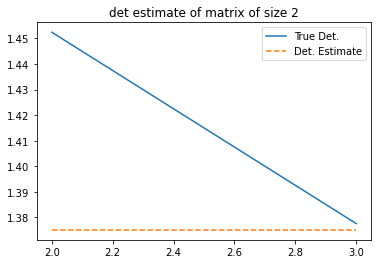

determinant A -0.8936678171157837 with dim 4
Last MC estimate 0.8653034567832947 for dim 4 based on 1000 samples 



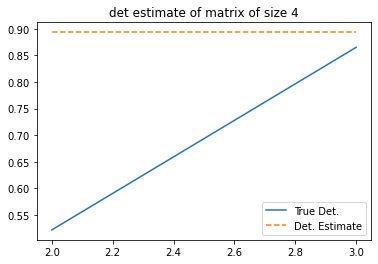

determinant A 0.5831965804100037 with dim 6
Last MC estimate 1.8709572553634644 for dim 6 based on 1000 samples 



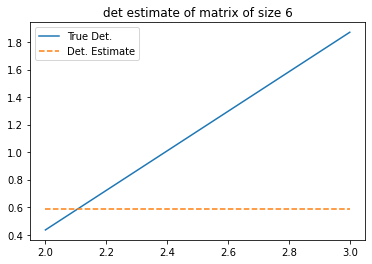

determinant A 93.76643371582031 with dim 8
Last MC estimate 137.23143005371094 for dim 8 based on 1000 samples 



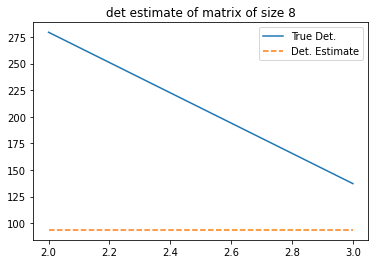

determinant A 398.93096923828125 with dim 10
Last MC estimate 1160.390380859375 for dim 10 based on 1000 samples 



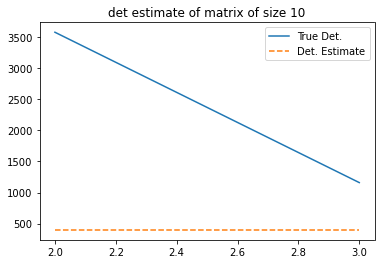

determinant A -65462.05859375 with dim 12
Last MC estimate 278681.8125 for dim 12 based on 1000 samples 



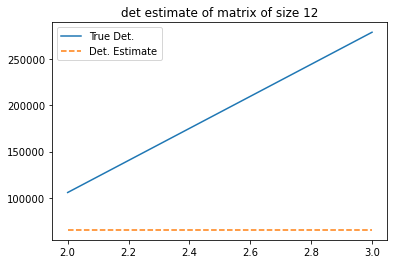

In [4]:
import time
import matplotlib.pyplot as plt

max_samples = 4

# torch.manual_seed(2)

range_dim = range(2, 13, 2)

for dim in range_dim:
    
    vol_sphere = torch.exp(log_surface_hypersphere(n_dim_sphere = dim -1))
    
    A = torch.randn(dim, dim)

    print(f'determinant A {torch.det(A)} with dim {dim}')

    det_estimates = []

    start_time = time.time()
    
    total_time = 0
    
    range_ = range(2, max_samples)

    for exp in range_:
        
        nr_samples = 10 ** exp 

        s = torch.randn(nr_samples, dim)
        s = s / torch.norm(s, dim=1, keepdim=True)

        s = s.unsqueeze(-1)

        As = torch.matmul(A, s).squeeze(-1)
        
        integrand = 1 / torch.norm(As, dim=1) ** dim

        MC_integrand = torch.mean(integrand)

        det_estimates.append(1 / MC_integrand)
        
        total_time += time.time() - start_time

        det_A = torch.det(A).numpy()
    
    print(f'Last MC estimate {det_estimates[-1]} for dim {dim} based on {nr_samples} samples \n')
    plt.title(f'det estimate of matrix of size {dim}')
    plt.plot(range_, det_estimates, label = 'True Det.')
    plt.plot(range_, np.abs([det_A] * (max_samples-2)), '--', label='Det. Estimate')
    plt.legend()
    plt.show()
        
    